<a href="https://colab.research.google.com/github/ananyamohapatra20/Supervised_Learning_Classification/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [315]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [316]:
# Load the Titanic dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [317]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [318]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Preprocess the data**


In [319]:
#Find the missing values
print("Age missing entries =",train_data.Age.isnull().sum())
print("survived missing entries =",train_data.Survived.isnull().sum())
print("Pclass missing entries =",train_data.Pclass.isnull().sum())
print("SibSp missing entries =",train_data.SibSp.isnull().sum())
print("Parch missing entries =",train_data.Parch.isnull().sum())
print("Fare missing entries =",train_data.Fare.isnull().sum())
print("Cabin missing entries =",train_data.Cabin.isnull().sum())
print("Embarked missing entries =",train_data.Embarked.isnull().sum())

Age missing entries = 177
survived missing entries = 0
Pclass missing entries = 0
SibSp missing entries = 0
Parch missing entries = 0
Fare missing entries = 0
Cabin missing entries = 687
Embarked missing entries = 2


In [320]:
# Remove unnecessary columns
train_data = train_data.drop([ 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop([ 'Name', 'Ticket', 'Cabin'], axis=1)

In [321]:
# Fill missing values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())



In [322]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [323]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [324]:

# Convert categorical variables to numerical
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1}).astype(int)
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [325]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


Visualize the data

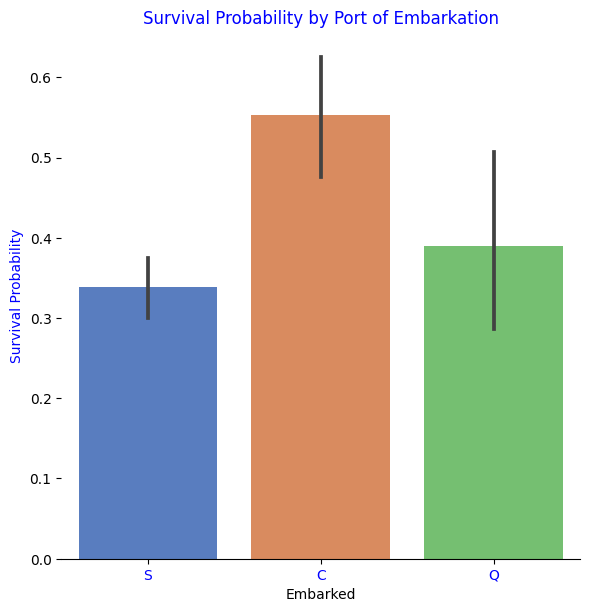

In [326]:
#Survival Probability by Port of Embarkation

g = sns.catplot(x="Embarked", y="Survived" ,data=train_data,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Survival Probability",color="Blue")
g.set_xticklabels(["S", "C", "Q"],color="Blue")
plt.title("Survival Probability by Port of Embarkation",color="Blue")
plt.show()


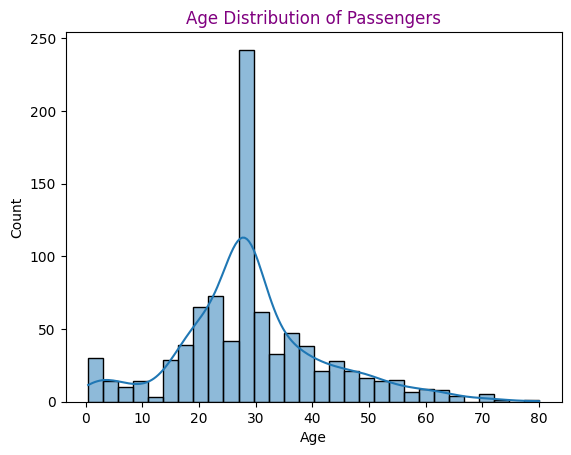

In [327]:
#Age Distribution of Passengers
sns.histplot(data=train_data, x="Age", kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers",color="purple")
plt.show()


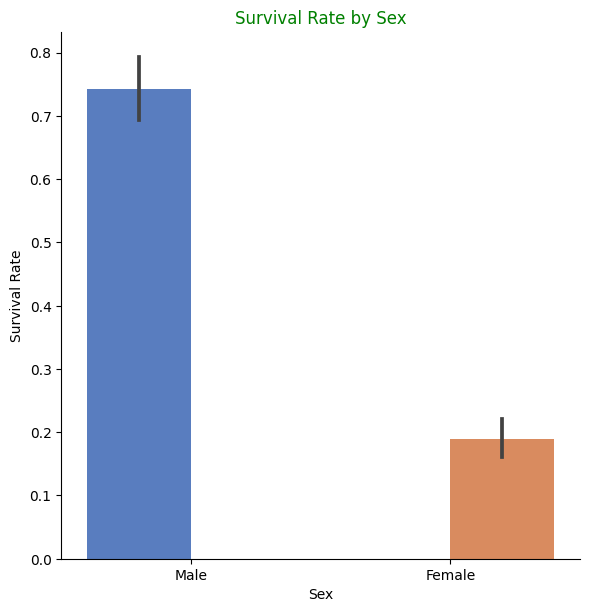

In [328]:
#Check Survival Rate by Sex

plot1 = sns.catplot(x="Sex", y="Survived", hue="Sex", data=train_data, height=6, kind="bar", palette="muted")
plot1.set_axis_labels("Sex", "Survival Rate")
plot1.set_xticklabels(["Male", "Female"])
plt.title("Survival Rate by Sex",color="green")
plt.show()

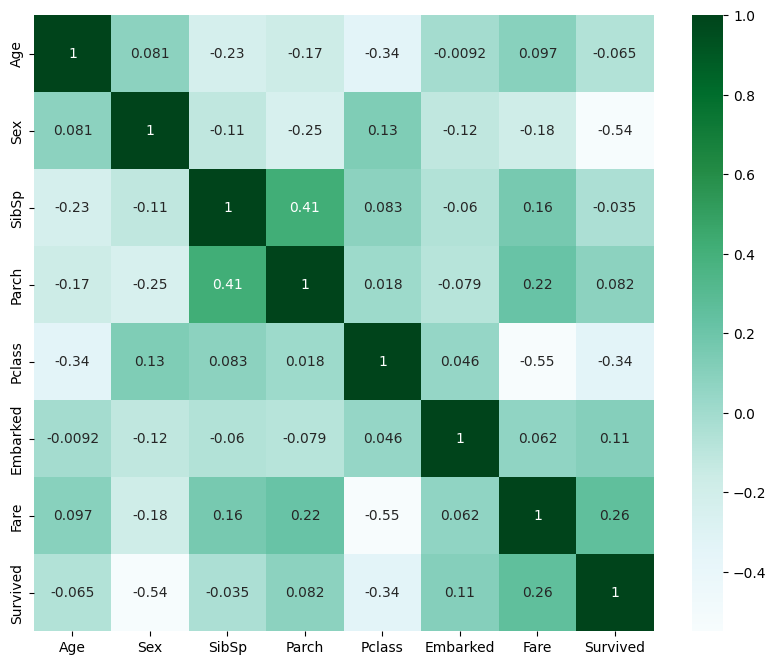

In [329]:
correlation_matrix = train_data[["Age", "Sex", "SibSp", "Parch", "Pclass", "Embarked", "Fare", "Survived"]].corr()

# create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="BuGn")

# Display the plot
plt.show()

**Implementation of naive bayes algorithm**

In [330]:
#calculates the prior probabilities of each class label in the training set
def calculate_prior(y_train):
    unique_labels, counts = np.unique(y_train, return_counts=True)
    prior_probabilities = counts / len(y_train)
    return prior_probabilities
#calculates the likelihood probabilities for a given feature value and label
def calculate_likelihood(x_train, y_train, feature_value, label):
    numerator = np.sum((x_train[y_train == label] == feature_value), axis=0) + 1
    denominator = np.sum(y_train == label) + 2
    likelihood = numerator / denominator
    return likelihood
# performs the Naive Bayes classification on the test set 
def naive_bayes(x_train, y_train, x_test):
    num_examples, num_features = x_train.shape
    num_labels = len(np.unique(y_train))
    predicted_labels = []
    prior_probabilities = calculate_prior(y_train)
    
    for i in range(len(x_test)):
        posteriors = np.zeros(num_labels)
        for label in range(num_labels):
            likelihoods = np.zeros(num_features)
            for feature in range(num_features):
                likelihoods[feature] = calculate_likelihood(x_train[:, feature], y_train, x_test[i, feature], label)
            posteriors[label] = np.sum(np.log(likelihoods))
        posterior_probabilities = np.log(prior_probabilities) + posteriors
        predicted_label = np.argmax(posterior_probabilities)
        predicted_labels.append(predicted_label)
    
    return predicted_labels
#calculates the accuracy of the predicted labels by comparing them to the true labels
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [331]:
# Split features and target
x_train = train_data.drop('Survived', axis=1).values
y_train = train_data['Survived'].values
x_test = test_data.values

x_train


array([[  1.    ,   3.    ,   1.    , ...,   0.    ,   7.25  ,   0.    ],
       [  2.    ,   1.    ,   0.    , ...,   0.    ,  71.2833,   1.    ],
       [  3.    ,   3.    ,   0.    , ...,   0.    ,   7.925 ,   0.    ],
       ...,
       [889.    ,   3.    ,   0.    , ...,   2.    ,  23.45  ,   0.    ],
       [890.    ,   1.    ,   1.    , ...,   0.    ,  30.    ,   1.    ],
       [891.    ,   3.    ,   1.    , ...,   0.    ,   7.75  ,   2.    ]])

In [332]:
# Naive Bayes algorithm
predictions = naive_bayes(x_train, y_train, x_train)
predictions

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,


In [333]:
# Calculate accuracy
accuracy = calculate_accuracy(y_train, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8888888888888888


In [334]:
# Generate submission file
submission = pd.DataFrame({
    'PassengerId': train_data['PassengerId'],
    'Survived': predictions
})
submission.to_csv('NaiveBayessubmission.csv', index=False)
print("Submission file generated.")


Submission file generated.


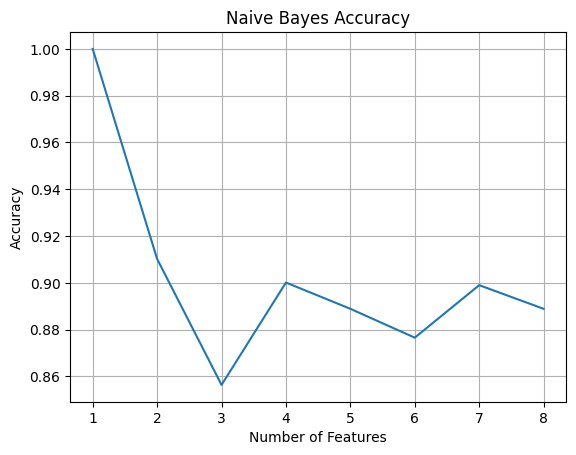

In [335]:

# Visualize accuracy
num_features = x_train.shape[1]
accuracies = []

for num in range(1, num_features + 1):
    selected_features = x_train[:, :num]
    predictions = predict(selected_features, y_train, selected_features)
    accuracy = calculate_accuracy(y_train, predictions)
    accuracies.append(accuracy)

plot_accuracy(accuracies)

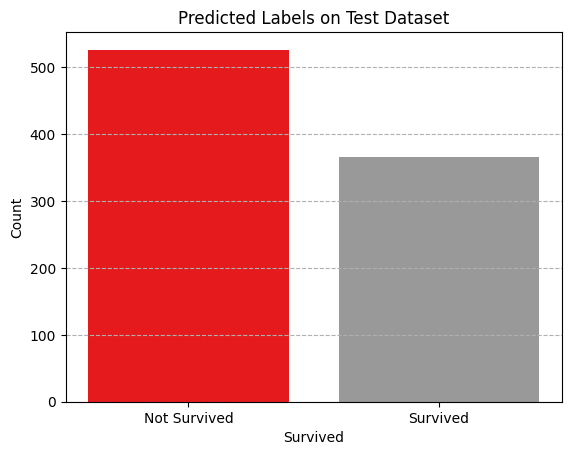

In [336]:
# Count occurrences of predicted labels in the test dataset
predicted_test_counts = np.bincount(predictions)

# x-axis positions for the bars
x_test = np.arange(len(predicted_test_counts))

# color palette for the bars
colors = plt.cm.Set1(np.linspace(0, 1, len(predicted_test_counts)))

# Bar plot for predicted labels on the test dataset
plt.bar(x_test, predicted_test_counts, color=colors)

plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Predicted Labels on Test Dataset")
plt.xticks(x_test, ['Not Survived', 'Survived'])  # Update x-axis labels
plt.grid(axis='y', linestyle='--')  # Add grid lines
plt.show()
